<a href="https://colab.research.google.com/github/rrodffer/visualizacao-de-dados/blob/main/R_VIS_Aula_2_Pacotes_de_visualiza%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes de visualização em Python

## Setup

In [ ]:
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import altair as alt

from bokeh.plotting import figure, show

from plotnine import *

pio.renderers.default = 'colab' # ativar plotly no colab
output_notebook() # ativar bokeh
alt.renderers.enable('default') # ativar renderer do Altair

# para permitir figuras inline no Colab
%matplotlib inline


Preparação de dados de Ocorrência da ANAC

In [ ]:
# anac = pd.read_csv("https://sistemas.anac.gov.br/dadosabertos/Seguranca%20Operacional/Ocorrencia/V_OCORRENCIA_AMPLA.csv", sep =';', skiprows = 1)

In [ ]:
# anac['Operador'] = anac['Operador'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# anac['Operador'] = anac['Operador'].replace('AZUL LINHAS AEREAS BRASILEIRAS S.A', 'AZUL')
# anac['Operador'] = anac['Operador'].replace('AZUL LINHAS AEREAS BRASILEIRAS S.A.', 'AZUL')
# anac['Operador'] = anac['Operador'].replace('TAM LINHAS AEREAS S.A', 'TAM')
# anac['Operador'] = anac['Operador'].replace('GOL LINHAS AEREAS S.A', 'GOL')
# anac['Operador'] = anac['Operador'].replace('GOL LINHAS AEREAS S.A.', 'GOL')

,Numero_da_Ocorrencia,Lesoes_Fatais_Tripulantes,Lesoes_Fatais_Passageiros,Lesoes_Fatais_Terceiros,Lesoes_Graves_Tripulantes,Lesoes_Graves_Passageiros,Lesoes_Graves_Terceiros,Lesoes_Leves_Tripulantes,Lesoes_Leves_Passageiros,Lesoes_Leves_Terceiros,Ilesos_Tripulantes,Ilesos_Passageiros,Lesoes_Desconhecidas_Tripulantes,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,PMD,Numero_de_Assentos
count,14080.000000,9544.000000,9430.000000,9369.000000,9493.000000,9388.000000,9362.000000,9543.000000,9395.000000,9361.000000,11840.000000,10732.000000,9372.000000,9362.000000,9362.000000,13583.000000,13572.000000
mean,15262.002060,0.090319,0.124496,0.007578,0.036027,0.027588,0.002777,0.071256,0.062161,0.003418,1.991301,13.980991,0.021980,0.081179,0.001816,23921.799602,52.008179
std,15511.101774,0.338916,2.502218,0.169285,0.201050,0.254888,0.061952,0.296621,0.472323,0.075878,65.989368,37.908945,0.244777,2.729407,0.064521,37607.281035,74.829097
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3415.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1542.000000,4.000000
50%,6814.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2948.000000,7.000000
75%,31465.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,50790.000000,112.000000
max,45190.000000,6.000000,181.000000,12.000000,2.000000,6.000000,2.000000,5.000000,18.000000,4.000000,7179.000000,352.000000,12.000000,165.000000,4.000000,351534.000000,430.000000


In [ ]:
# top5_operadores = (
#     anac
#     .groupby('Operador')
#     .size()
#     .reset_index(name='counts')
#     .sort_values('counts', ascending=False)
#     .head(5)
# )['Operador']
# top5_operadores

848                                 AZUL
4703                                 TAM
2259                                 GOL
209                AEROCLUBE DE LONDRINA
3059    LIDER TAXI AEREO S/A  AIR BRASIL
Name: Operador, dtype: object

In [ ]:
# anac['Hora_da_Ocorrencia'] = anac['Hora_da_Ocorrencia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# anac['vitimas'] = anac.filter(like='Lesoes').sum(axis=1)
# top_operadores = anac.loc[anac['Operador'].isin(top5_operadores),['Operador', 'vitimas','Regiao','Classificacao_da_Ocorrencia', 'Numero_de_Assentos']]
# top_operadores.rename(columns = {'Operador':'operador', 'Classificacao_da_Ocorrencia':'gravidade', 'Hora_da_Ocorrencia':'horario', 'Numero_de_Assentos':'assentos', 'Regiao':'regiao'}, inplace = True)

# top_operadores.to_csv('top_operadores.csv', index=False)

top_operadores = read.csv("http://www.facom.ufu.br/~albertini/vis/top_operadores.zip")

## Visão geral dos pacotes de visualização em Python

Na aula passada vimos conceitos básicos para montar uma bom visualização de dados. Hoje, veremos exemplos de diferentes pacotes disponíveis em Python.

https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries

---

![](https://optimise2.assets-servd.host/voracious-blesbok/production/Blog/PythonVisLandscape.jpg?w=1200&auto=compress%2Cformat&fit=crop&dm=1632326979&s=35cf543e04fd14bcc881ef8e70363860)

---


### Comparação entre pacotes

Vamos usar apenas um gráfico para demonstrar funcionalidade de pacotes de visualização em Python.


- plotly
- altair
- bokeh
- plotnine
- matplotlib
- seaborn

Como referência usaremos um gráfico de disperção do FICO relacionado com a Relação de Empréstimo com Valor (REV) por credor.
O primeiro passo será fazer uma redução dos dados fazendo amostragem aleatória.

Vamos então demonstrar as funcionalidades básicas de cada biblioteca.

In [ ]:
top3_credores = pd.read_csv("http://www.facom.ufu.br/~albertini/vis/top3_credores_fico.zip")[['credor','fico','rev']]

# amostra dos dados de empréstimos dos 3 credores com maior volume
top3_credores_amostra = top3_credores.sample(frac=0.05)
top3_credores_amostra.head()


anac = pd.read_csv("https://sistemas.anac.gov.br/dadosabertos/Seguranca%20Operacional/Ocorrencia/V_OCORRENCIA_AMPLA.csv", sep =';', skiprows = 1)


,credor,fico,rev
22903,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",764.0,59
26584,QUICKEN LOANS INC.,656.0,70
27838,"WELLS FARGO BANK, N.A.",688.0,80
3128,"WELLS FARGO BANK, N.A.",750.0,51
27037,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",778.0,61


## **Plotly Express**

- https://plotly.com/python/plotly-express

- Uma figura é criada com uma única função `px.scatter()`.
- Nome das colunas são passadas como texto para os parâmetros `x` e `y`.
- Muito bom para gráficos rápidos de baixo customização com interatividade.
- Note a posição ruim da legenda.

In [ ]:
# single call to px.scatter creates the plotly express figure
fig_basica_plotly = px.scatter(
    # select data frame of reference
    data_frame = top3_credores_amostra,
    # column name of x-axis data
    x = "rev",
    # column name of y-axis data
    y = "fico",
    # column name of categories to use for colors
    color = "credor",
    # text to be used for chart title
    title = "Gráfico dispersão Plotly",
    # setting the size of the plot to be output
    height = 600,
    width = 900
)

fig_basica_plotly.show()

### Prática: dados ANAC

Faça um gráfico de dispersão com plotly dos dados da ANAC com dois dados numéricos para as cinco operadoras com mais vôos no histórico.

## **Altair**
    
- https://altair-viz.github.io/gallery/scatter_tooltips.html
- Múltiplos métodos envolvidos para codificação de gramáfica de gráficos
- Codificações compostas de nomes de colunas e `:<tipo_da_codificação>`, implicitamente ou explicitamente (por exemplo,`:Q` indica variável quantitativa).
- Interatividade pode ser ligada e desligada separadamente.

In [ ]:
# plot do altair começa especificando o data frame contendo os dados
fig_basica_altair = (alt.Chart(top3_credores_amostra)
 # atribuímos uma marca (elemento geométrico)
 .mark_circle(size=60)
 # configuração codificação
 .encode(
    # a letras após ":" indicam o tipo da variável (*Q*uantitativa, *N*ominal)
    x = 'rev:Q',
    y = alt.Y('fico:Q', scale = alt.Scale(zero=False)),
    color = 'credor:N'
)
 # interatividade especificada separadamente
 .interactive()
 # definição de título
).properties(
    title = 'Gráfico de dispersão Altair'
)

fig_basica_altair

alt.Chart(...)

### Prática: dados ANAC

Faça um gráfico de dispersão com Altair dos dados da ANAC com dois dados numéricos para os diferentes níveis de gravidade.

In [ ]:

# plot do altair começa especificando o data frame contendo os dados
fig_basica_altair = (alt.Chart(top_operadores)
 # atribuímos uma marca (elemento geométrico)
 .mark_circle(size=60)
 # configuração codificação
 .encode(
    # a letras após ":" indicam o tipo da variável (*Q*uantitativa, *N*ominal)
    x = 'assentos:Q',
    y = alt.Y('vitimas:Q', scale = alt.Scale(zero=False)),
    color = 'operador:N',
)
 # interatividade especificada separadamente
 .interactive()
 # definição de título
).properties(
    title = 'Gráfico de dispersão Altair'
)

fig_basica_altair


alt.Chart(...)

## **Bokeh**

- https://docs.bokeh.org/en/latest/docs/user_guide/basic/scatters.html
- Não usa coloração a partir de dados categóricos (como em gramática de gráficos)
- Não é projetado para dados `tidy` (por exemplo, em `data frames`)
- Título e outros são especificados ao criar a figura ou depois.
- Best for people that want to build smaller apps and do everything within the Bokeh ecosystem.
- Bouncing back and forth between interactive bokeh viewing and saving bokehs out can be troublesome at times, [as described here](https://stackoverflow.com/questions/51512907/how-to-stop-bokeh-from-opening-a-new-tab-in-jupyter-notebook).

In [ ]:
# devemos manualmente configurar cores para cada credor
def set_color(row):
    if row['credor'] == 'WELLS FARGO BANK, N.A.':
        return "red"
    elif row['credor'] == 'QUICKEN LOANS INC.':
        return "blue"
    else:
        return "green"

# atualizamos o data.frame para incluir nova coluna para cores
top3_credores_amostra_cores_bokeh = (top3_credores_amostra.assign(cor_manual = top3_credores_amostra.apply(set_color, axis=1))
)

top3_credores_amostra_cores_bokeh.head()

,credor,fico,rev,cor_manual
22903,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",764.0,59,green
26584,QUICKEN LOANS INC.,656.0,70,blue
27838,"WELLS FARGO BANK, N.A.",688.0,80,red
3128,"WELLS FARGO BANK, N.A.",750.0,51,red
27037,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",778.0,61,green


In [ ]:
from bokeh.plotting import figure, output_notebook, show

# começa com a definição do espaço da figura
basic_bokeh_fig = figure(title="Gráfico de dispersão Bokeh", width=400, height=400)

# fazemos chamada ao renderizador `circle` com as cores definidas manualmente
basic_bokeh_fig.circle(
    x=top3_credores_amostra['rev'],
    y=top3_credores_amostra['fico'],
    color=top3_credores_amostra_cores_bokeh['cor_manual']
)

# displays the chart in-line
output_notebook()
show(basic_bokeh_fig)


### Prática: dados ANAC

Faça um gráfico de dispersão com Altair dos dados da ANAC com dois dados numéricos para as diferentes regiões do país. Lembre-se de criar manualmente as cores.

## **Plotnine**

- https://plotnine.org/reference/geom_point.html#basic-scatter-plot
- Sintaxe do ggplot2: https://ggplot2.tidyverse.org/reference/ggplot.html


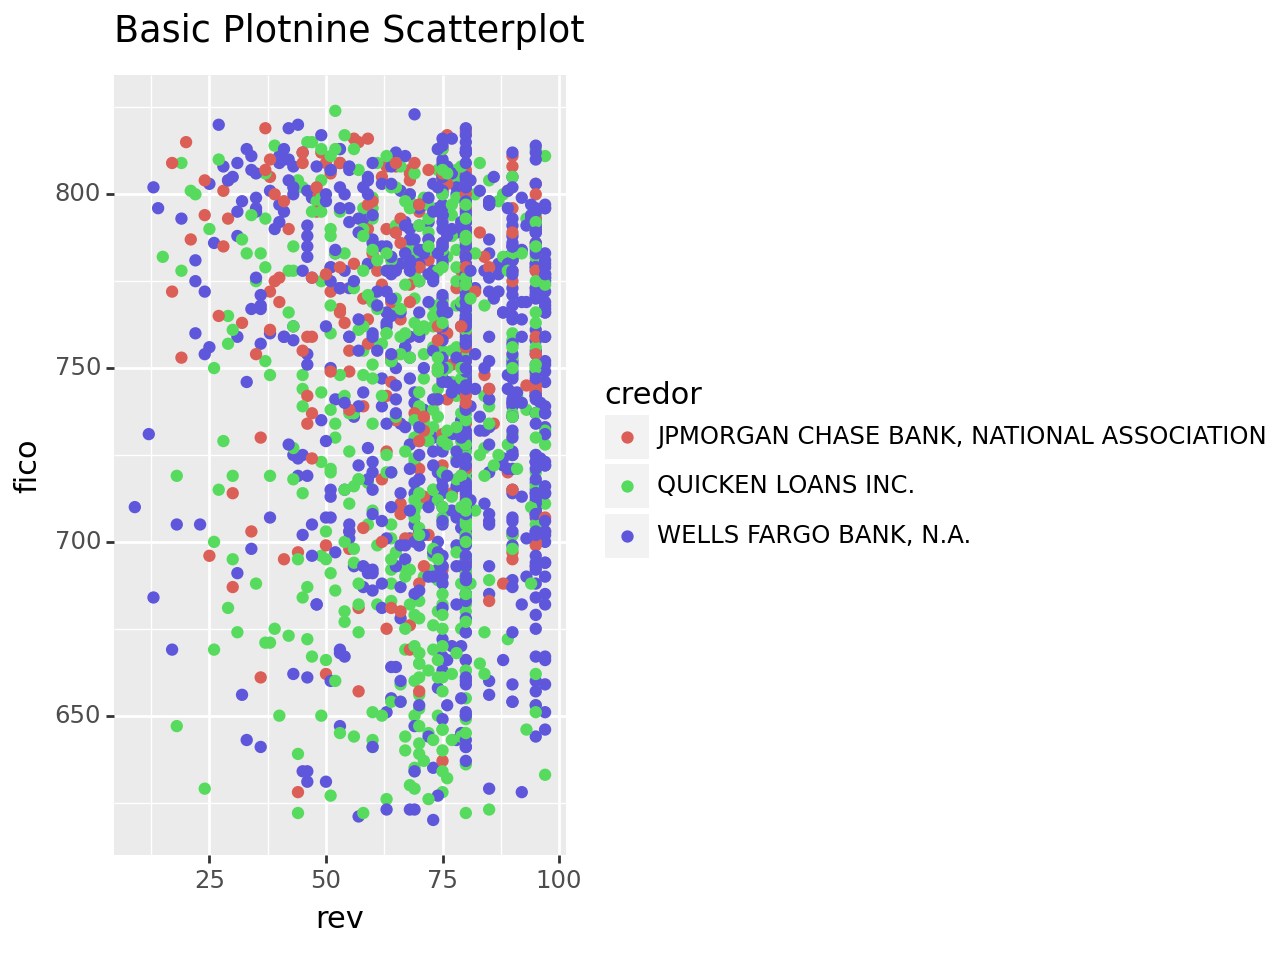

In [ ]:
# Uma figura começa com a identificação dos dados e segue com múltiplas camadas com '+'
from plotnine import  *
basic_plotnine_fig = (ggplot(
    # dados vêm logo em seguida da definição de elementos estéticos
    aes(x='rev', y='fico', color = 'credor'), top3_credores_amostra )
    # define tipo do geom
    + geom_point()
    + ggtitle("Basic Plotnine Scatterplot")
    )

# displays the chart in-line
basic_plotnine_fig.draw()

### Prática: dados ANAC

Reproduza o gráfico de dispersão obtido com o Bokeh agora usando o Plotnine.

## **Matplotlib**

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
- Cores devem configuradas manualmente
- Altamente configurável porém altamente manual: descrições de eixos devem ser explicitamente definidas.
- Dados podem vir de diferentes data frames.

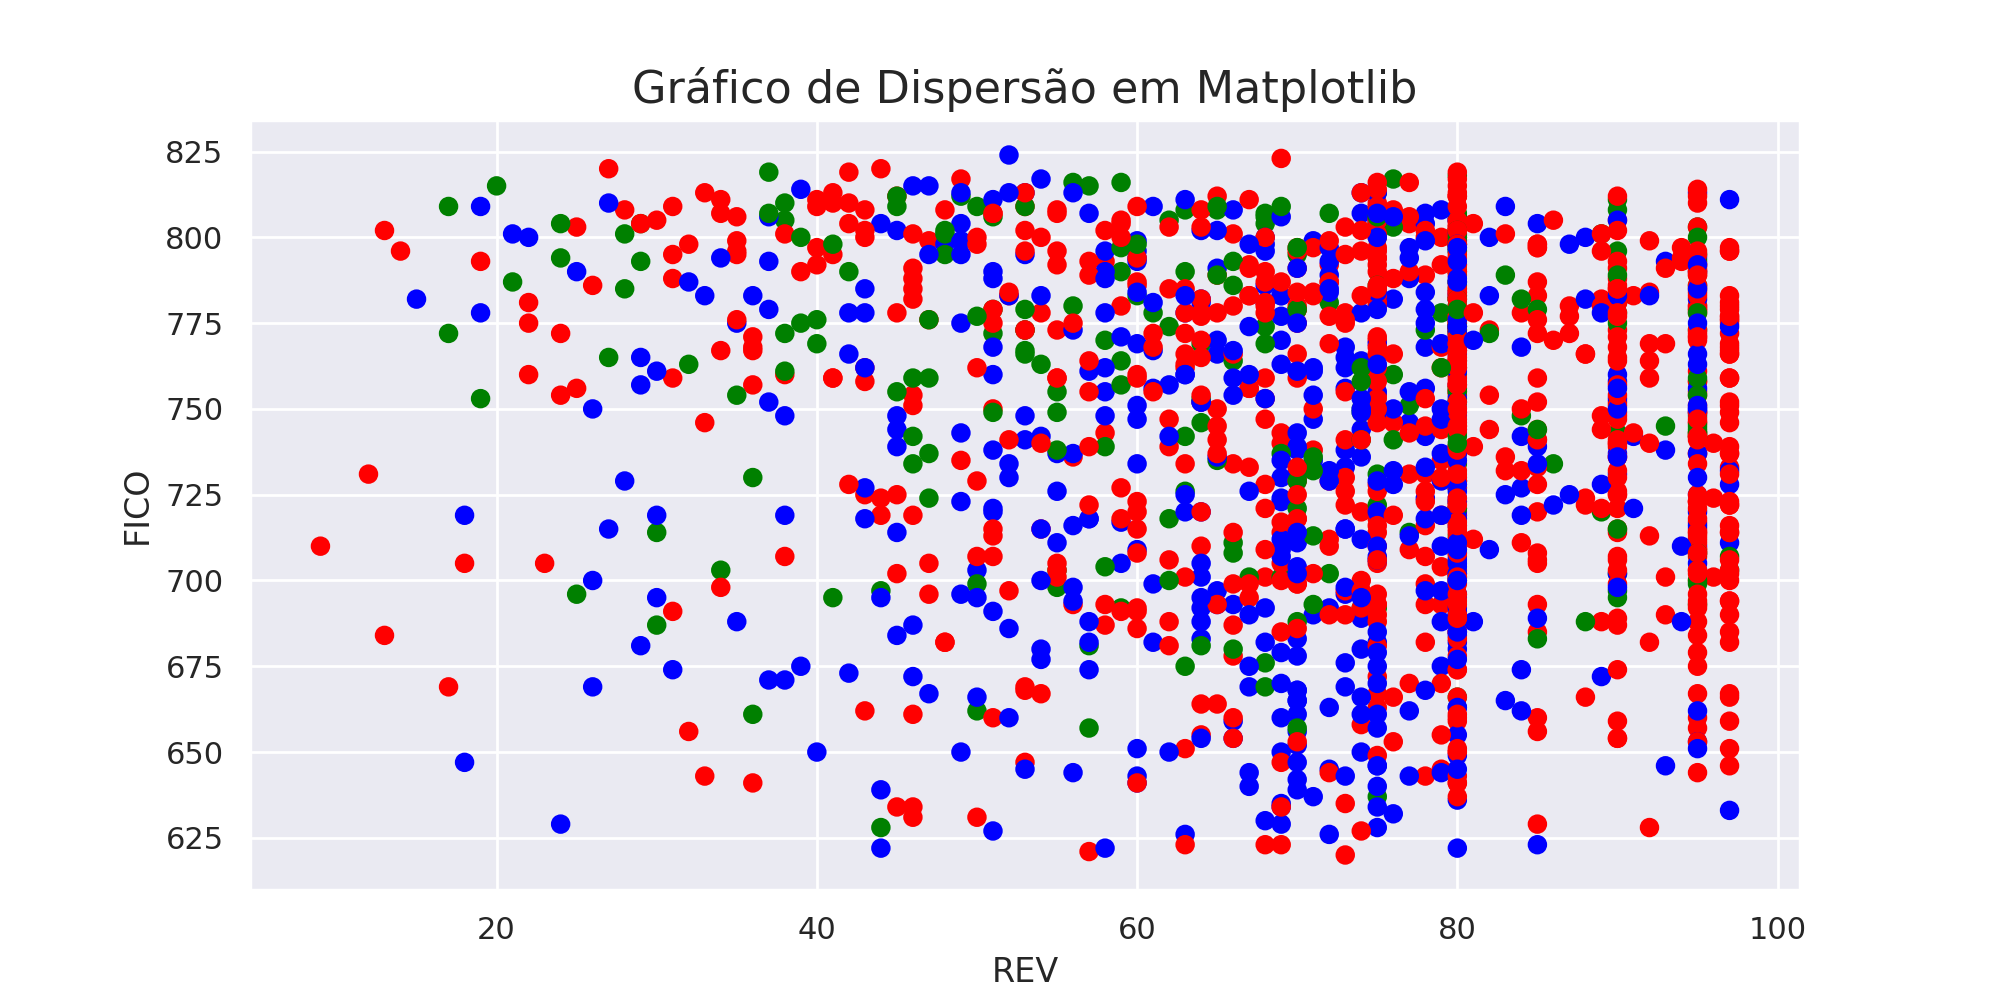

In [ ]:
plt.figure(figsize=(10, 5))

# começar com  plt.scatter()
basic_matplotlib_fig = plt.scatter(
    x = top3_credores_amostra.loc[:,'rev'],
    y = top3_credores_amostra.loc[:,'fico'],
    # colors specified manually as described above; a label won't work here
    c = top3_credores_amostra_cores_bokeh.loc[:,'cor_manual']
)

# adding some basic chart properties--labels and title
plt.xlabel('REV', fontsize=12)
plt.ylabel('FICO', fontsize=12)
plt.title('Gráfico de Dispersão em Matplotlib', fontsize = 16)

# displays the chart in-line
basic_matplotlib_fig;

In [ ]:
### Prática: dados ANAC

Reproduza o gráfico de dispersão obtido com o Bokeh agora usando o Matplotlib.

## **Seaborn**

- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Parecido ao matplotlib, porém mais conveniente.
- Funções preparadas para receber um data frame

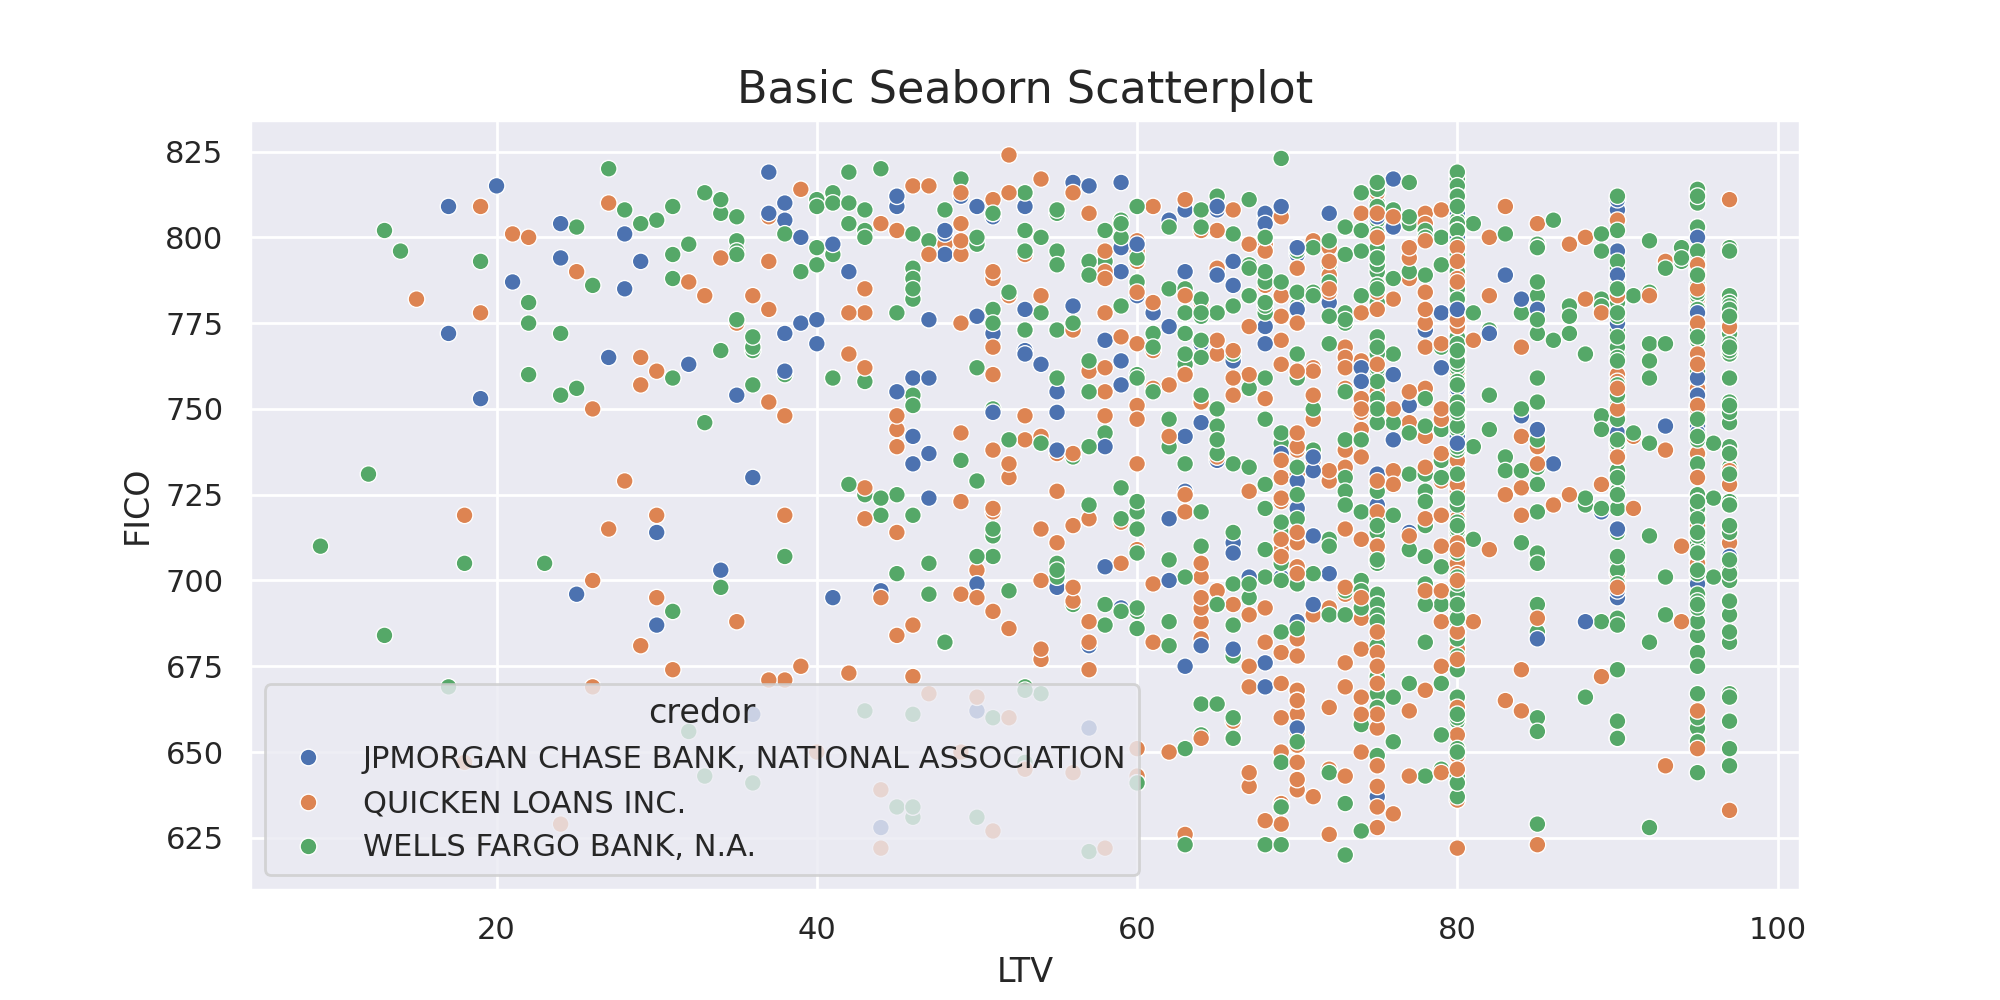

In [ ]:
plt.figure(figsize=(10, 5))

# figura começa com sns.scatterplot()
basic_seaborn_fig = sns.scatterplot(
    data = top3_credores_amostra,
    x = 'rev',
    y = 'fico',
    hue = 'credor'
)

plt.xlabel('LTV', fontsize=12)
plt.ylabel('FICO', fontsize=12)
plt.title("Basic Seaborn Scatterplot", fontsize = 16)

basic_seaborn_fig;

### Qual pacote escolher?

1. Aquele disponível no seu ambiente se esse não for configurado por você.
2. Aquele com a funcionalidade necessária.
3. Aquele que o seu time sabe trabalhar.
4. Aquele que você sabe mexer melhor.

In [ ]:
### Prática: dados ANAC

Reproduza o gráfico de dispersão obtido com o Bokeh agora usando o Seaborn.